In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path='tezler.csv'

In [3]:
df=pd.read_csv(path)

In [4]:
df.head()

,Tez No,Yazar,Yıl,Tez Adı (Orijinal/Çeviri),Tez Türü,Konu
0,96287,YAKUP KARA,2000,Hücresel üretim sistemi tasarımında kullanılan...,Yüksek Lisans,Endüstri ve Endüstri Mühendisliği = Industrial...
1,93633,FÜSUN ATAMAN,2000,Bilgisayar simülasyonu ile yapay zeka içeren a...,Yüksek Lisans,Elektrik ve Elektronik Mühendisliği = Electric...
2,101002,ERCAN KAYAÖNÜ,2000,Yapay zekanın teorik temelleri\nTheoretical fu...,Yüksek Lisans,Bilgisayar Mühendisliği Bilimleri-Bilgisayar v...
3,106211,TANSEL DALGALI,2001,"Yapay zeka, bilinç ve tasarım\nArtificial inte...",Yüksek Lisans,Mimarlık = Architecture
4,109952,YAHYA KEMAL KIRAN,2001,'Yapay zeka uygulamalı askeri proje değerlendi...,Yüksek Lisans,Bilgisayar Mühendisliği Bilimleri-Bilgisayar v...


In [5]:
#movzularin ayrilmasi
df[['konu1', 'konu2', 'konu3']] = df['Konu'].str.split(";", expand = True)

In [6]:
pattern = r'=(.*)'

df['konu1'] = df['konu1'].str.extract(pattern)[0].str.strip()
df['konu2'] = df['konu2'].str.extract(pattern)[0].str.strip()
df['konu3'] = df['konu3'].str.extract(pattern)[0].str.strip()


In [9]:
df.drop(columns=['Konu', 'Tez No'], inplace=True)

In [8]:
df.head()

,Tez No,Yazar,Yıl,Tez Adı (Orijinal/Çeviri),Tez Türü,Konu,konu1,konu2,konu3
0,96287,YAKUP KARA,2000,Hücresel üretim sistemi tasarımında kullanılan...,Yüksek Lisans,Endüstri ve Endüstri Mühendisliği = Industrial...,Industrial and Industrial Engineering,NaN,NaN
1,93633,FÜSUN ATAMAN,2000,Bilgisayar simülasyonu ile yapay zeka içeren a...,Yüksek Lisans,Elektrik ve Elektronik Mühendisliği = Electric...,Electrical and Electronics Engineering,NaN,NaN
2,101002,ERCAN KAYAÖNÜ,2000,Yapay zekanın teorik temelleri\nTheoretical fu...,Yüksek Lisans,Bilgisayar Mühendisliği Bilimleri-Bilgisayar v...,Computer Engineering and Computer Science and ...,NaN,NaN
3,106211,TANSEL DALGALI,2001,"Yapay zeka, bilinç ve tasarım\nArtificial inte...",Yüksek Lisans,Mimarlık = Architecture,Architecture,NaN,NaN
4,109952,YAHYA KEMAL KIRAN,2001,'Yapay zeka uygulamalı askeri proje değerlendi...,Yüksek Lisans,Bilgisayar Mühendisliği Bilimleri-Bilgisayar v...,Computer Engineering and Computer Science and ...,NaN,NaN


In [10]:
#bir meqale icinde istifade olunan movzu sayinin tapilmasi

def topicvariety(row):
    num = 0
    if not pd.isna(row['konu1']):
        num += 1
    if not pd.isna(row['konu2']):
        num += 1
    if not pd.isna(row['konu3']):
        num += 1
    return num


df['topic_num'] = df.apply(topicvariety, axis=1)

    

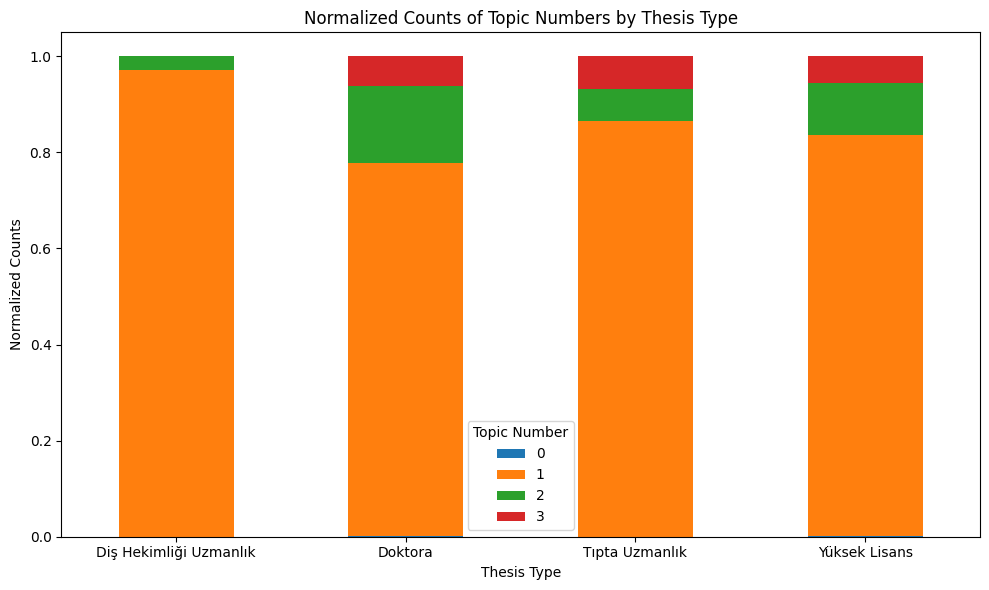

In [11]:
#hansi nov akademik meqalelerde nece movzudan istifade olunub
grouped_normalized_counts = df.groupby(['Tez Türü'])['topic_num'].value_counts(normalize=True).unstack(fill_value=0)

grouped_normalized_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Thesis Type')
plt.ylabel('Normalized Counts')
plt.title('Normalized Counts of Topic Numbers by Thesis Type')

plt.legend(title='Topic Number')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [12]:
konu1_dict=df['konu1'].value_counts().to_dict()
konu2_dict=df['konu2'].value_counts().to_dict()
konu3_dict=df['konu3'].value_counts().to_dict()

In [13]:
#movuzlarin umumi siyahisinin yaradilmasi
konular = {}

for c in konu1_dict:
    if c in konu2_dict and c not in konu3_dict:
        konular[c] = konu1_dict[c] + konu2_dict[c]

for c in konu1_dict:
    if c in konu3_dict and c not in konu2_dict:
        konular[c] = konu1_dict[c] + konu3_dict[c]

for c in konu1_dict:
    if c in konu2_dict and c in konu3_dict:
        konular[c] = konu1_dict[c] + konu2_dict[c] + konu3_dict[c]

for c in konu2_dict:
    if c not in konu1_dict and c in konu3_dict:
        konular[c] = konu2_dict[c] + konu3_dict[c]
        
        
konular = dict(sorted(konular.items(), key=lambda item: item[1], reverse=True))
print(konular)


{'Computer Engineering and Computer Science and Control': 1523, 'Electrical and Electronics Engineering': 507, 'Science and Technology': 177, 'Engineering Sciences': 156, 'Industrial and Industrial Engineering': 134, 'Business Administration': 127, 'Statistics': 96, 'Civil Engineering': 78, 'Mechatronics Engineering': 68, 'Geodesy and Photogrammetry': 62, 'Mechanical Engineering': 53, 'Biostatistics': 47, 'Bioengineering': 46, 'Education and Training': 41, 'Dentistry': 40, 'Energy': 38, 'Mathematics': 32, 'Radiology and Nuclear Medicine': 31, 'Economics': 29, 'Econometrics': 25, 'Law': 25, 'Biotechnology': 24, 'Architecture': 23, 'Management Information Systems': 22, 'Finance': 18, 'Agriculture': 17, 'Physics and Physics Engineering': 15, 'Environmental Engineering': 13, 'Transportation': 13, 'Communication Sciences': 13, 'Defense and Defense Technologies': 12, 'Technical Education': 12, 'Philosophy': 11, 'Neurology': 10, 'Aeronautical Engineering': 9, 'Sociology': 8, 'Radio and Televi

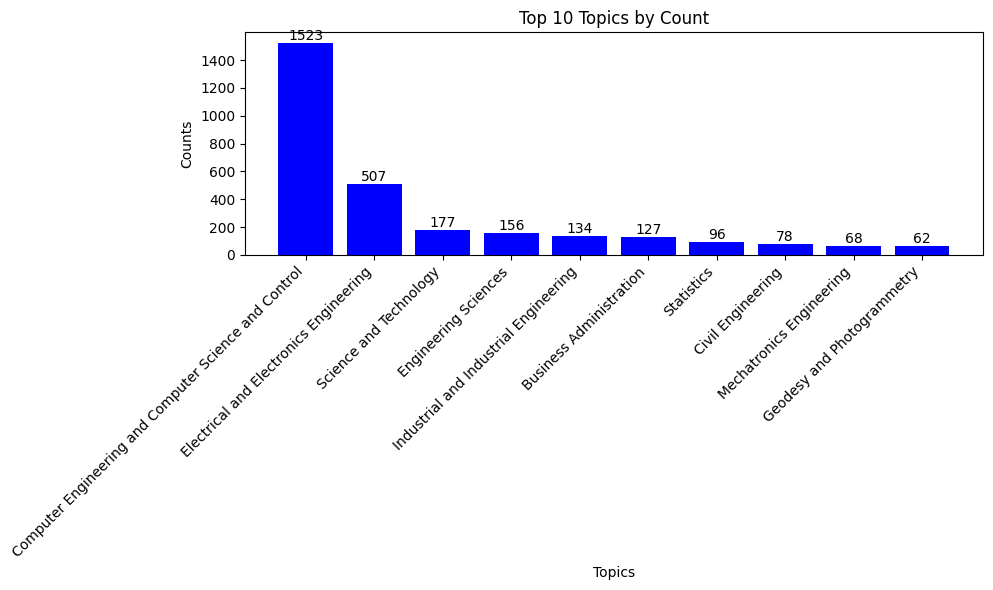

In [14]:
#en cox istifade olunan topicler
top_10 = dict(list(konular.items())[:10])

topics = list(top_10.keys())
counts = list(top_10.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(topics, counts, color='blue')
plt.xlabel('Topics')
plt.ylabel('Counts')
plt.title('Top 10 Topics by Count')
plt.xticks(rotation=45, ha='right')

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


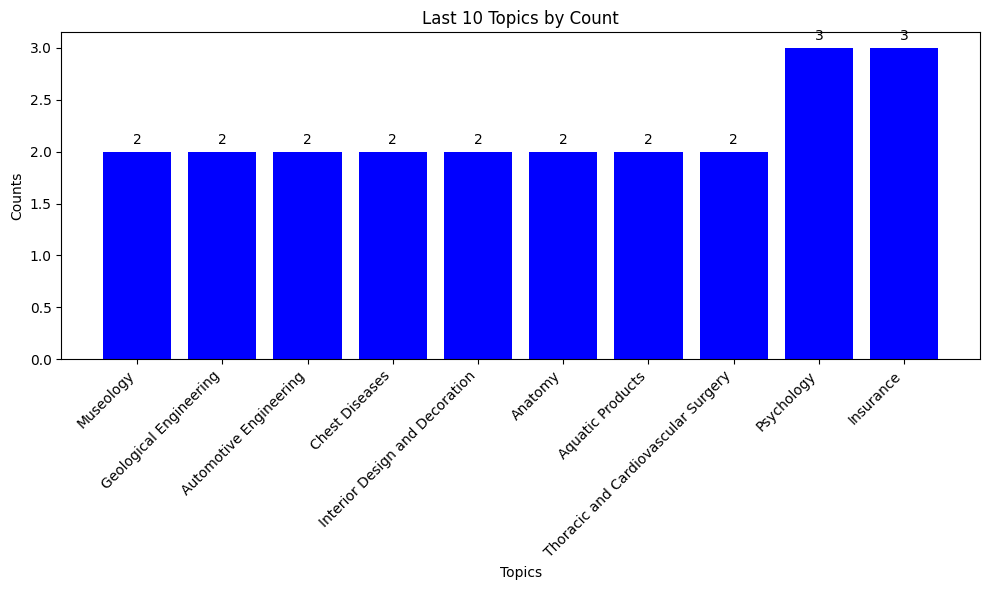

In [15]:
#en az istifade olunan topicler
reversed_konular = dict(reversed(list(konular.items())))
last_10 = dict(list(reversed_konular.items())[:10])

topics = list(last_10.keys())
counts = list(last_10.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(topics, counts, color='blue')

plt.xlabel('Topics')
plt.ylabel('Counts')
plt.title('Last 10 Topics by Count')
plt.xticks(rotation=45, ha='right')

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


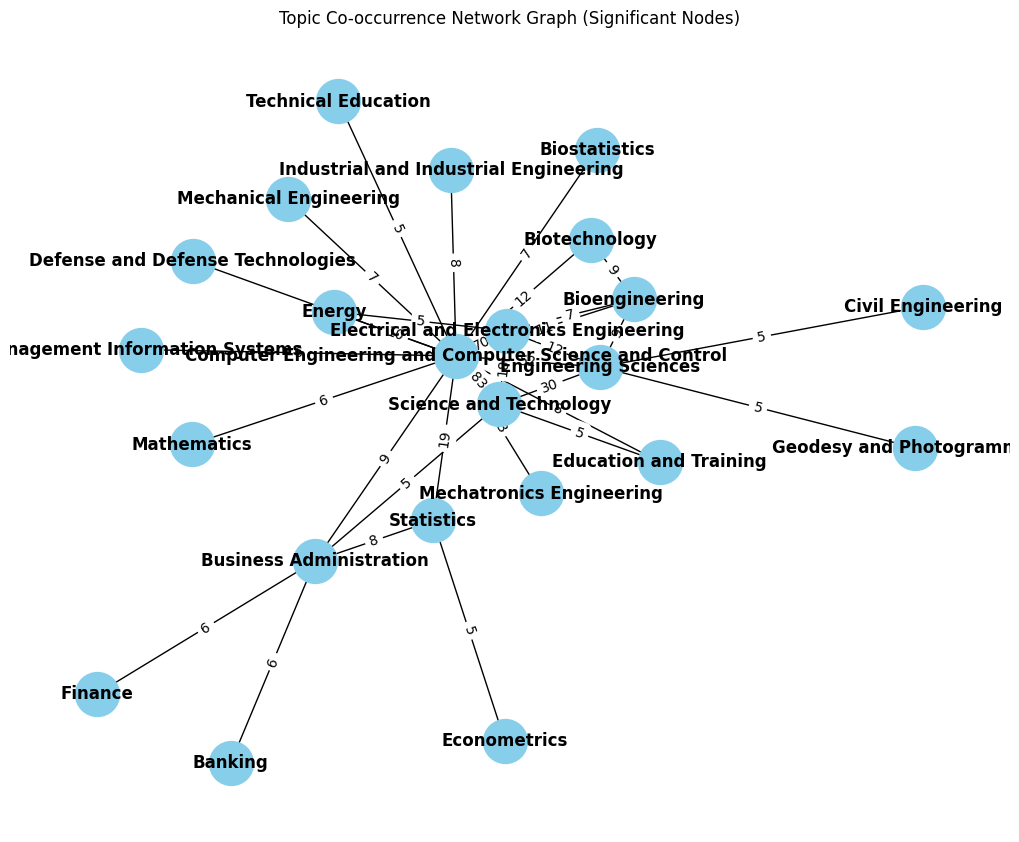

In [17]:
#en cox birlikde islenen movzularin tapilmasi

import networkx as nx
import itertools
combinations = df[['konu1', 'konu2', 'konu3']].apply(lambda row: list(itertools.combinations(row.dropna().unique(), 2)), axis=1)

all_combinations = list(itertools.chain.from_iterable(combinations))
combination_counts = pd.Series(all_combinations).value_counts()
significant_combinations = combination_counts[combination_counts >= 5]
significant_topics = list(set().union(*significant_combinations.index))

G = nx.Graph()
G.add_nodes_from(significant_topics)
for (topic1, topic2), weight in significant_combinations.items():
    G.add_edge(topic1, topic2, weight=weight)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Topic Co-occurrence Network Graph (Significant Nodes)')
plt.show()
